In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
n_samples = 1000

X1, Y1 = make_moons(n_samples=n_samples,
                    shuffle=True,
                    noise = 0.11,
                    random_state=42)

# 1. Графічне представлення початкових даних

## make_moons dataset

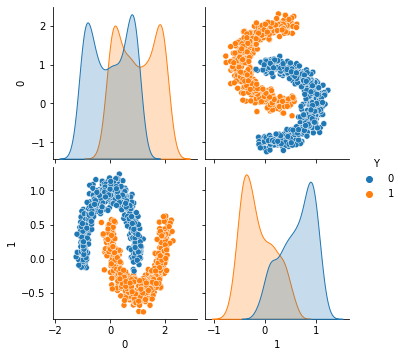

In [58]:
df1 = pd.DataFrame(X1)
df1["Y"] = Y1
sns.pairplot(df1, hue="Y")

## load_digits dataset

In [59]:
digits = load_digits()
X2 = digits["data"]
Y2 = digits["target"]
df2 = pd.DataFrame(data = digits["data"], columns = digits["feature_names"])
df2.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Матриця корреляції ознак

Елементи матриці показують відношення(кореляцію) між відповідними ознаками (від 0 - кореляція відсутня до 1 - лінійна залежність)

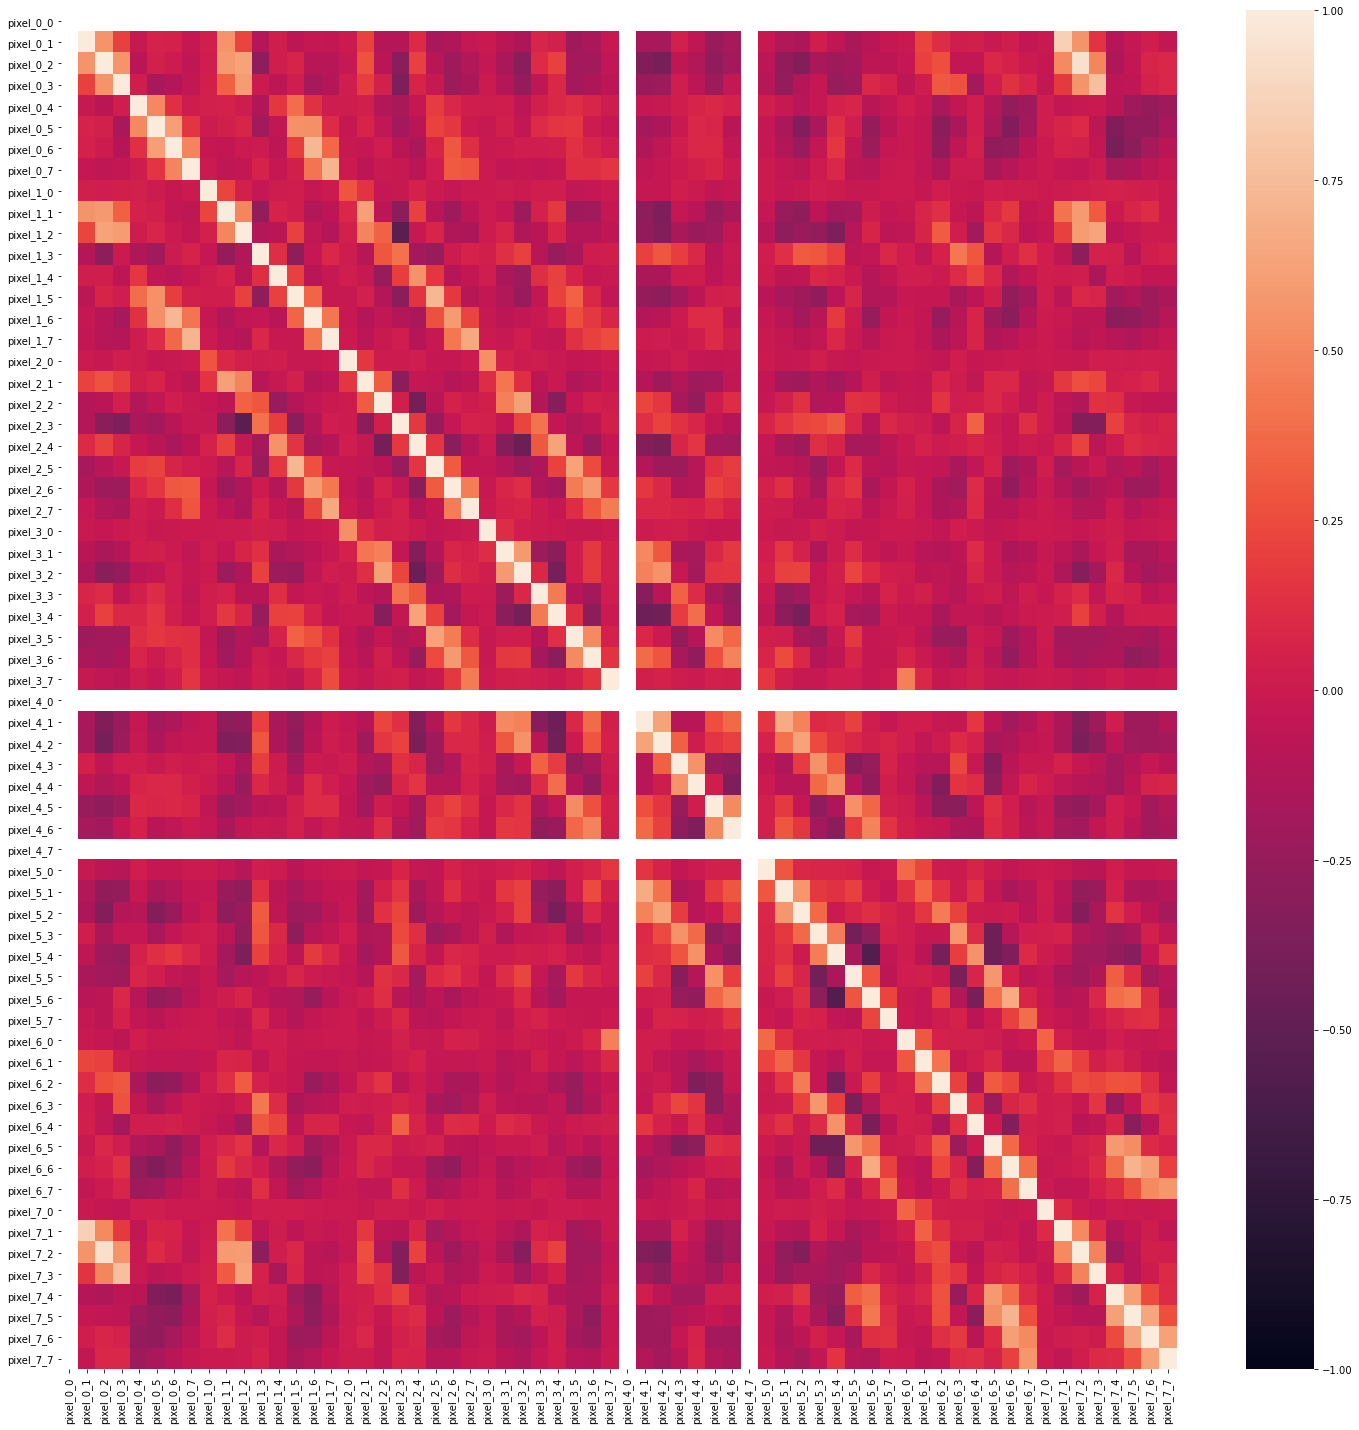

In [60]:
fig, ax = plt.subplots(figsize=(25, 25))
digits_heatmap = sns.heatmap(df2.corr(), vmin = -1)
#Отображать значения различимо невозможно, поэтому такая heatmap 
#(для пикселя 00 возникновение NAN нормальное, ибо там значения 0)

# 2. Розбити дані на навчальні та перевірочні набори

In [61]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.18, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.18, random_state=42)

# Moons dataset Decision tree

# Побудувати моделі класифікації згідно з варіантом

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

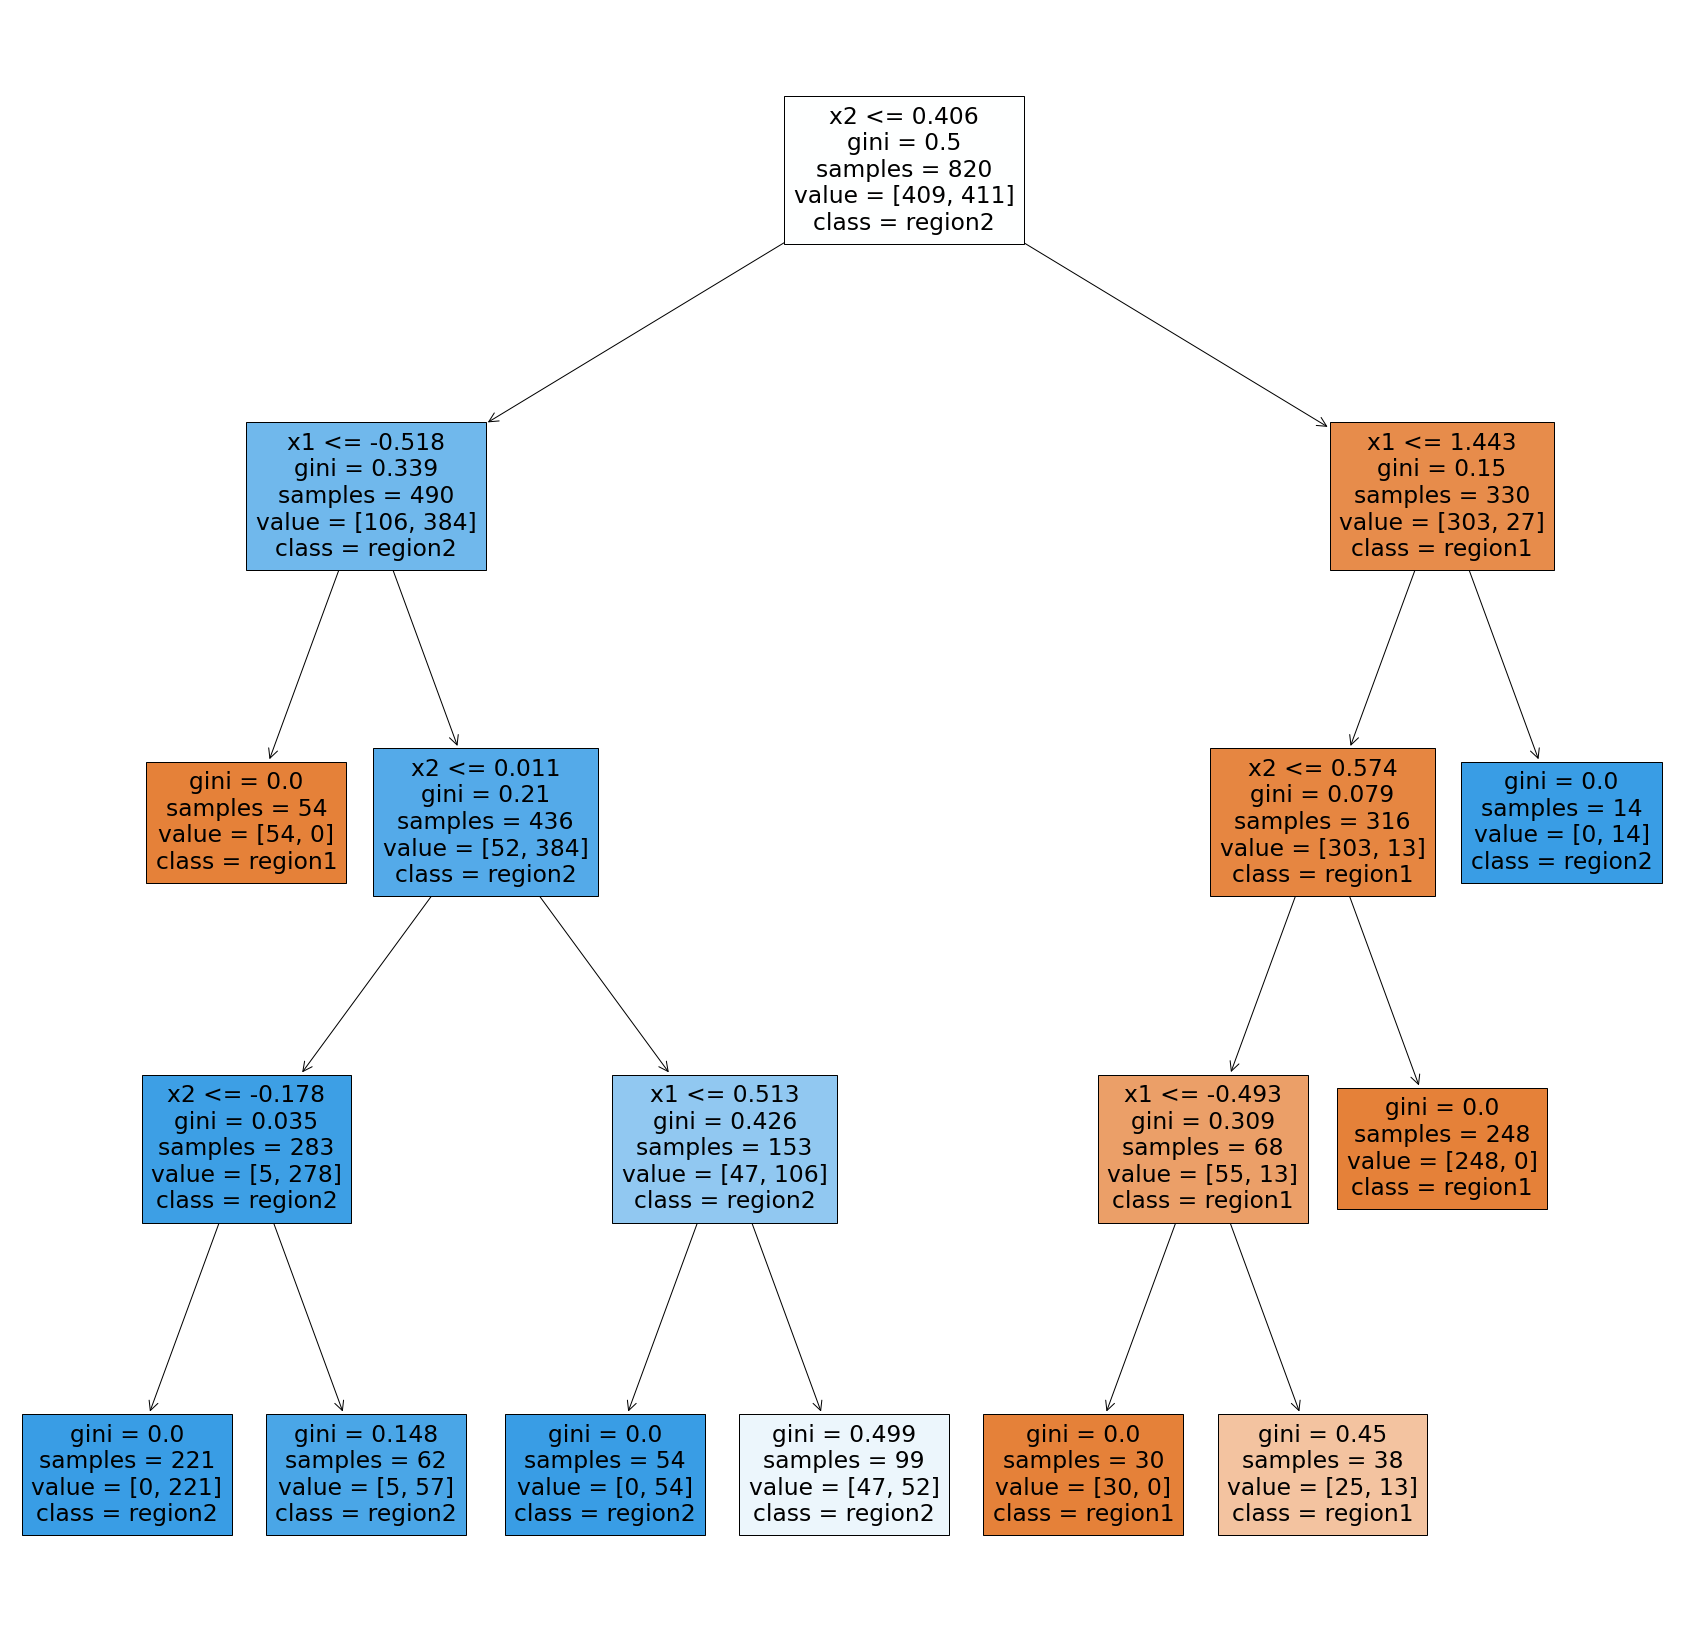

In [63]:
tree_clf = DecisionTreeClassifier(max_depth=4,
                                  min_samples_split=5,
                                  min_samples_leaf=1,
                                  max_leaf_nodes=10,
                                  max_features = 2
                                 )
tree_clf.fit(X1_train, Y1_train)

fig = plt.figure(figsize=(30, 30))
_ = plot_tree(tree_clf, 
         feature_names = ["x1", "x2"],
         class_names = ["region1", "region2"],
         filled = True)

# Графічне представлення моделі

In [64]:
def vizualize_tree(model, X, y, ax=None):
    ax = ax or plt.gca()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="rainbow",
              clim=(y.min(), y.max()), zorder=3)
    ax.axis("tight")
    ax.axis("off")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                        np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.25,
                          levels = np.arange(n_classes + 1) - 0.5,
                          cmap = "rainbow", clim=(y.min(), y.max()),
                          zorder = 1)
    ax.set(xlim=xlim, ylim=ylim)

E:\Anaconda\envs\main\lib\site-packages\ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'clim'


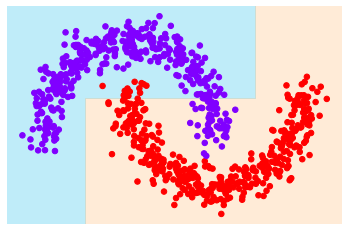

In [65]:
vizualize_tree(tree_clf, X1_train, Y1_train)

# Розрахування критерієв якості моделі

In [66]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve

In [67]:
def metrics(true, predict, probs):
    print("Precision score: ", precision_score(true, predict))
    print("Recall score: ", recall_score(true, predict))
    print("F1 score:", f1_score(true, predict))
    print("Confusion matrix:\n")
    cm = confusion_matrix(true, predict)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, linewidths=.5, cmap = "Blues_r")
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'F1 Score: {0}'.format(f1_score(true, predict))
    plt.title(all_sample_title, size = 15)
    plt.show()
    
    
    
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(true, probs)
    plt.plot(fpr, tpr)
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    precision, recall, _ = precision_recall_curve(true, probs)
    plt.plot(recall, precision)
    plt.title("PR Curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

Precision score:  0.8613861386138614
Recall score:  0.9775280898876404
F1 score: 0.9157894736842106
Confusion matrix:



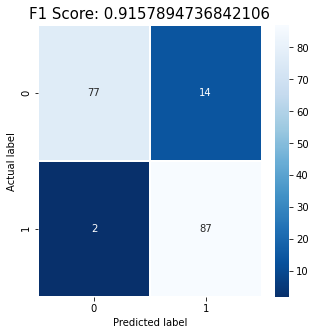

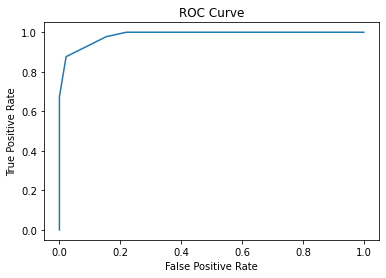

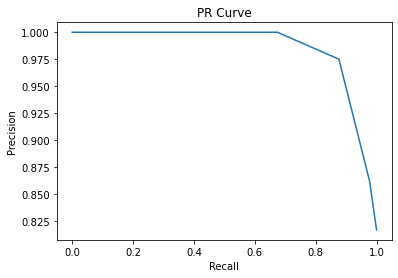

In [68]:
metrics(Y1_test, tree_clf.predict(X1_test), probs = tree_clf.predict_proba(X1_test))

З отриманих метрик можемо зробити висновок, що дана модель є досить ефективною для даної задачі бінарної класифікації. Високий показник <i>recall</i> = 0.97 показує, що модель здатна вдало розпізнавати приналежні до класів приклади, а <i>precision</i> = 0.86 вказує на те, що модель з класифікованих прикладів здатна точно знаходити саме потрібну мітку для прикладу

### Перевірка перенавчання (порівняння F1 score) 

In [69]:
def model_overfit(model, X_train, Y_train, X_test, Y_test):
    f1_train = f1_score(Y_train, model.predict(X_train))
    f1_test = f1_score(Y_test, model.predict(X_test))
    
    if f1_train > f1_test:
        print(f"Модель перенавчена: {f1_train} > {f1_test}")
    else:
        print(f"Модель недонавчена: {f1_train} > {f1_test}")

In [70]:
model_overfit(tree_clf, X1_train, Y1_train, X1_test, Y1_test)

Модель перенавчена: 0.9245063879210221 > 0.9157894736842106


# Digits dataset Decision tree

# Побудувати моделі класифікації згідно з варіантом

In [71]:
tree_clf_dig = DecisionTreeClassifier(max_depth=4,
                                  min_samples_split=20,
                                  min_samples_leaf=5,
                                  max_leaf_nodes=100,
                                  max_features = 20
                                 )
tree_clf_dig.fit(X2_train, Y2_train)

fig = plt.figure(figsize=(200, 200))
class_names = [f"Number {str(_)}" for _ in digits.target_names]
_ = plot_tree(tree_clf_dig, 
         feature_names = digits.feature_names,
         class_names = class_names,
             filled = True)
# Не очень разборчивое дерево, понятное дело. подробнее в файле

fig.savefig("Digits tree.png")

# Розрахування критерієв якості моделі

In [72]:
from sklearn.metrics import classification_report
def multiclass_metrics(true, predict):
    print("Confusion matrix:\n")
    cm = confusion_matrix(true, predict)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, linewidths=.5, cmap = "Blues_r")
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.show()
    
    
    print("\n", classification_report(true, predict))

In [73]:
def model_overfit_multiclass(model, X_train, Y_train, X_test, Y_test):
    f1_train = f1_score(Y_train, model.predict(X_train), average="weighted")
    f1_test = f1_score(Y_test, model.predict(X_test), average="weighted")
    
    if f1_train > f1_test:
        print(f"Model is overfitting: {f1_train} > {f1_test}")
    else:
        print(f"Model is underfitting: {f1_train} > {f1_test}")

Confusion matrix:



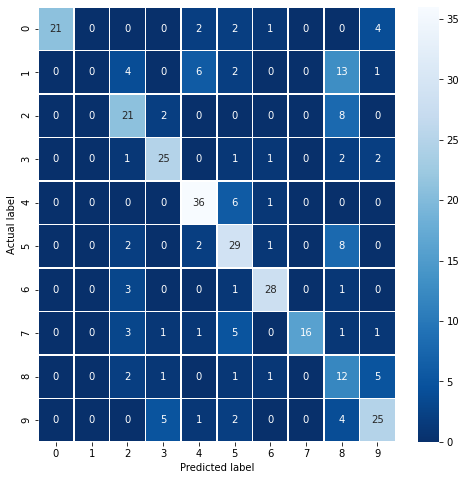


               precision    recall  f1-score   support

           0       1.00      0.70      0.82        30
           1       0.00      0.00      0.00        26
           2       0.58      0.68      0.63        31
           3       0.74      0.78      0.76        32
           4       0.75      0.84      0.79        43
           5       0.59      0.69      0.64        42
           6       0.85      0.85      0.85        33
           7       1.00      0.57      0.73        28
           8       0.24      0.55      0.34        22
           9       0.66      0.68      0.67        37

    accuracy                           0.66       324
   macro avg       0.64      0.63      0.62       324
weighted avg       0.66      0.66      0.65       324



E:\Anaconda\envs\main\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
multiclass_metrics(Y2_test, tree_clf_dig.predict(X2_test))

З отриманих даних для мультикласифікації можемо спостерігати, що модель справляється не найкращим чином. Причинами можуть слугувати недостатні параметри моделі. Так для глибини 4 макс. можлива кількість листків становить 16, а класів 10, тобто деякі обмежуються лише одним листком. Або ж в цілому модель дерева рішень може бути порівняно слабкою для задачі розпізнавання цифр по пікселям. 

Також з метрик можна побачити, що мітки "1" та "8" мають погані результати, що може бути спричинене або біасом при розбитті даних (міток "1" у тестовому наборі всього 26, а "8" - 21 - найнижчий показник), або імінентною вадою задачі розпізнавання, яку без, наприклад, конволюцій, важко усунути, напр. сплутання зі схожими цифрами (напр. "8" з "3"), що видно з confusion matrix.

### Перевірка перенавчання (порівняння зважених F1 score) 

In [75]:
model_overfit_multiclass(tree_clf_dig, X2_train, Y2_train, X2_test, Y2_test)

Model is overfitting: 0.6520299243900208 > 0.6470347961607488


# Виконати решітчатий пошук для підбору гіперпараметрів моделей. На основі критеріїв якості вибрати найкращу модель

In [76]:
from sklearn.model_selection import GridSearchCV

param_vals_bin = {
    "max_depth": np.arange(1, 6),
    "min_samples_split": np.arange(1, 100, 25),
    "min_samples_leaf": np.arange(1, 500, 50),
    "max_leaf_nodes": np.arange(10, 1000, 100),
    "max_features": [1, 2]    
}
param_vals_multi = {
    "max_depth": np.arange(1, 10),
    "min_samples_split": np.arange(1, 300, 50),
    "min_samples_leaf": np.arange(1, 500, 100),
    "max_leaf_nodes": np.arange(10, 1000, 100),
    "max_features" : np.arange(1, 40, 5)   
}

In [77]:
grid_clf_moons = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_vals_bin, n_jobs=-1)
grid_clf_moons.fit(X1_train, Y1_train)

print(f"В результаті решітчатого пошуку отримали модель з такими параметрами: {grid_clf_moons.best_params_}")
print(f"Точність найкращої моделі: {grid_clf_moons.best_score_}")

В результаті решітчатого пошуку отримали модель з такими параметрами: {'max_depth': 5, 'max_features': 2, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 26}
Точність найкращої моделі: 0.9829268292682926


In [78]:
grid_clf_dig = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_vals_multi, n_jobs=-1)
grid_clf_dig.fit(X2_train, Y2_train)
print(f"В результаті решітчатого пошуку отримали модель з такими параметрами: {grid_clf_dig.best_params_}")
print(f"Точність найкращої моделі: {grid_clf_dig.best_score_}")

В результаті решітчатого пошуку отримали модель з такими параметрами: {'max_depth': 9, 'max_features': 36, 'max_leaf_nodes': 610, 'min_samples_leaf': 1, 'min_samples_split': 51}
Точність найкращої моделі: 0.7875291133402513


# Навчити моделі на підмножинах даних. Оцінити, наскільки розмір навчальної множини впливає на якість моделей.

In [79]:
from sklearn.model_selection import learning_curve

In [80]:
train_sizes_1, train_scores_1, test_scores_1 = learning_curve(DecisionTreeClassifier(max_depth=5,
                                                                                    max_features=2,
                                                                                    max_leaf_nodes=10,
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=26), 
                                                              X1, Y1, train_sizes=np.arange(1, 150), cv=7)

In [81]:
train_sizes_2, train_scores_2, test_scores_2 = learning_curve(DecisionTreeClassifier(max_depth=8,
                                                                                    max_features=36,
                                                                                    max_leaf_nodes=210,
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=51),
                                                              X2, Y2, train_sizes=np.arange(1, 150), cv=7)

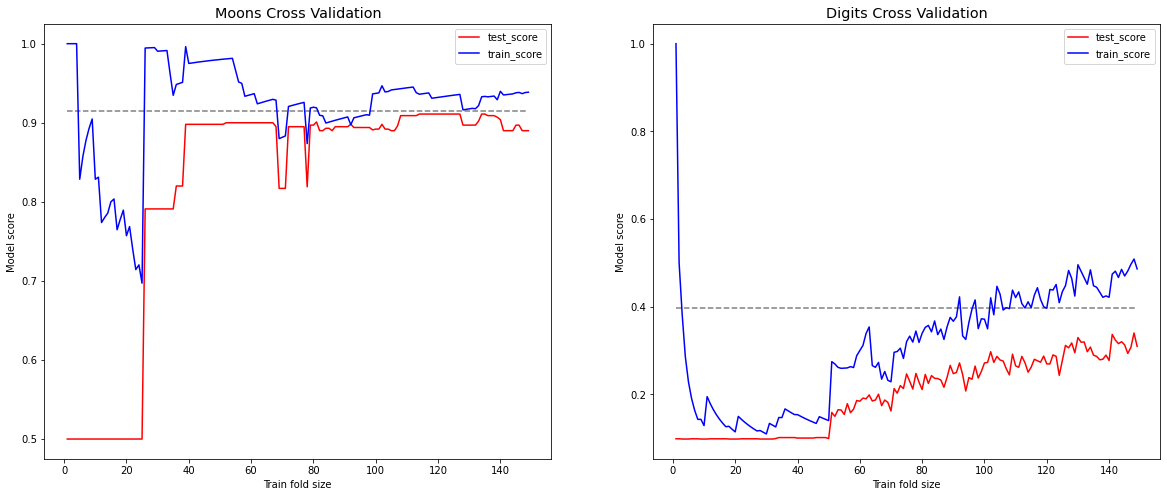

In [82]:
_, figs = plt.subplots(1, 2, figsize=(20, 8))

figs[0].plot(train_sizes_1, np.mean(test_scores_1, 1), color='red', label='test_score')
figs[0].plot(train_sizes_1, np.mean(train_scores_1, 1), color='blue', label='train_score')
figs[0].hlines(np.mean([train_scores_1[-1], test_scores_1[-1]]), train_sizes_1[0], train_sizes_1[-1], color='grey', linestyle='dashed')
figs[0].legend(loc=0)
#figs[0].
figs[0].set_title('Moons Cross Validation', size='x-large')

figs[1].plot(train_sizes_2, np.mean(test_scores_2, 1), color='red', label='test_score')
figs[1].plot(train_sizes_2, np.mean(train_scores_2, 1), color='blue', label='train_score')
figs[1].hlines(np.mean([train_scores_2[-1], test_scores_2[-1]]), train_sizes_2[0], train_sizes_2[-1], color='grey', linestyle='dashed')
figs[1].legend(loc=0)
figs[1].set_title('Digits Cross Validation', size='x-large')

for fig in figs.flat:
    fig.set(xlabel='Train fold size', ylabel='Model score')
plt.show()

# Висновок:
Як бачимо, при збільшенні розмірів навчальної вибірки, точність моделі збільшується. Але починаючи з певної величини (наочно побачимо для першого набору даних, що значення 80) відбувається зменшення віддачі (diminishing returns), тож подальше збільшення розмірів підмножин можна вважати неефективним.

Для вибірки з розпізнаванням чисел можна спостерігати, що алгоритм дерев справляється не найкращим чином, даючи в середньому точність 40%. Можна ствердити, що метод ансамблів міг би дати кращі результати, або ж використати конволюції (спостерігаючи значення матриці кореляцій)